In [13]:
import pandas as pd

df = pd.read_csv("all_datasets_aligned.csv")
print(df.head())          # Ver as primeiras linhas
print(df['flag'].value_counts())  # Quantos exemplos tem de cada classe


C:\Users\thelo\AppData\Local\Temp\ipykernel_10256\568968466.py:3: DtypeWarning: Columns (3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_datasets_aligned.csv")


    id  val1  val2 val3  val4   val5   val6   val7   val8    flag
0  790     5    33  104   9.0   33.0   33.0    0.0  111.0  BENIGN
1  399   254    91    0   0.0    0.0   60.0    0.0    0.0  BENIGN
2  608    25    33   34  48.0    8.0  142.0  109.0   58.0  BENIGN
3  672   100     0  154  29.0  151.0    2.0  189.0    0.0  BENIGN
4  809    64   187  127  20.0   17.0   32.0    0.0   20.0  BENIGN
flag
BENIGN    16189165
DoS         662184
RPM         654897
gear        597252
Fuzzy       491846
Name: count, dtype: int64


In [14]:
import pandas as pd

# Defina o número de amostras desejado para "BENIGN"
n_samples_benign = 1000_000  # ou 1_000_000, como preferir

# Separe a classe majoritária
benign_df = df[df['flag'] == 'BENIGN']

# Separe as demais classes (minoritárias)
minor_classes_df = df[df['flag'] != 'BENIGN']

# Amostragem aleatória da classe BENIGN
benign_sampled = benign_df.sample(n=n_samples_benign, random_state=42)

# Combine novamente o DataFrame balanceado
df_balanced = pd.concat([benign_sampled, minor_classes_df], axis=0)

# Embaralhar o DataFrame final
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar a nova distribuição
print(df_balanced['flag'].value_counts())

df = df_balanced
df.to_csv("all_datasets_aligned_balanced.csv", index=False)
del df_balanced, benign_df, minor_classes_df, benign_sampled

flag
BENIGN    1000000
DoS        662184
RPM        654897
gear       597252
Fuzzy      491846
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df = df.dropna()

# Remove a coluna 'ID'
df = df.drop(columns=['id'])




In [16]:
print(df['flag'].value_counts())


flag
BENIGN    1000000
DoS        662184
RPM        654897
gear       597252
Fuzzy      491846
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificar rótulos em números
le = LabelEncoder()
df['flag'] = le.fit_transform(df['flag'])

X = df.drop(columns=['flag'])  # Features
y = df['flag']                 # Rótulos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=40)

del df  # Liberar memória

In [8]:
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Definir o classificador base
# mlp = MLPClassifier(random_state=42, early_stopping=True)

# # Grade de hiperparâmetros
# param_grid = {
#     'hidden_layer_sizes': [(30,), (50,), (30, 30)],
#     'activation': ['relu', 'tanh'],
#     'alpha': [0.0001, 0.01, 0.1],
#     'learning_rate_init': [0.001, 0.01],
#     'solver': ['adam', 'sgd'],
#     'max_iter': [300]
# }

# # Validação cruzada estratificada
# cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# # Executa a busca
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, 
#                            scoring='accuracy', cv=cv, n_jobs=1, verbose=3)

# grid_search.fit(X, y)

# # Resultados
# print("Melhores parâmetros encontrados:")
# print(grid_search.best_params_)

# print(f"Melhor acurácia: {grid_search.best_score_:.4f}")


In [9]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.neural_network import MLPClassifier

# mlp_cv = MLPClassifier(
#     hidden_layer_sizes=(30, 30),
#     alpha=0.0001,
#     activation='relu',
#     max_iter=300,
#     solver='adam',
#     random_state=42,
#     early_stopping=True
# )

# cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# scores_10cv = cross_val_score(mlp_cv, X, y, cv=cv10, scoring='accuracy')

# print(f"Acurácia média (10x CV): {scores_10cv.mean():.4f} ± {scores_10cv.std():.4f}")

In [10]:
# from sklearn.metrics import classification_report

# # Treinar o modelo com os dados de treino
# mlp_model = MLPClassifier(
#     hidden_layer_sizes=(30, 30),
#     alpha=0.0001,
#     activation='relu',
#     max_iter=300,
#     solver='adam',
#     random_state=42,
#     early_stopping=True
# )
# mlp_model.fit(X_train, y_train)

# # Prever nos dados de teste
# y_pred = mlp_model.predict(X_test)

# # Exibir relatório de classificação com 4 dígitos de precisão
# print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str), digits=5))

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report

# Parâmetros
n_epochs = 25
classes = np.unique(y_train)

# Criar o modelo com warm_start=True para treinar por época
mlp_model = MLPClassifier(
    hidden_layer_sizes=(30, 30),
    alpha=0.0001,
    activation='relu',
    solver='adam',
    max_iter=1,
    warm_start=True,
    random_state=42
)

# Listas para armazenar métricas por época
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

# Treinamento manual por época
for epoch in range(n_epochs):
    mlp_model.fit(X_train, y_train)

    # Probabilidades para calcular log loss
    y_train_proba = mlp_model.predict_proba(X_train)
    y_test_proba = mlp_model.predict_proba(X_test)

    # Loss
    train_loss = log_loss(y_train, y_train_proba)
    test_loss = log_loss(y_test, y_test_proba)

    # Acurácia
    train_acc = accuracy_score(y_train, mlp_model.predict(X_train))
    test_acc = accuracy_score(y_test, mlp_model.predict(X_test))

    # Armazenar
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

# Após treino, imprimir relatório final
y_pred = mlp_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str), digits=5))


c:\Users\thelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

              precision    recall  f1-score   support

      BENIGN    0.99955   0.96077   0.97978    200000
         DoS    0.94556   1.00000   0.97202    132437
       Fuzzy    0.99782   0.99911   0.99846     98369
         RPM    0.99999   1.00000   1.00000    130980
        gear    0.99995   1.00000   0.99997    119450

    accuracy                        0.98835    681236
   macro avg    0.98857   0.99198   0.99005    681236
weighted avg    0.98896   0.98835   0.98840    681236



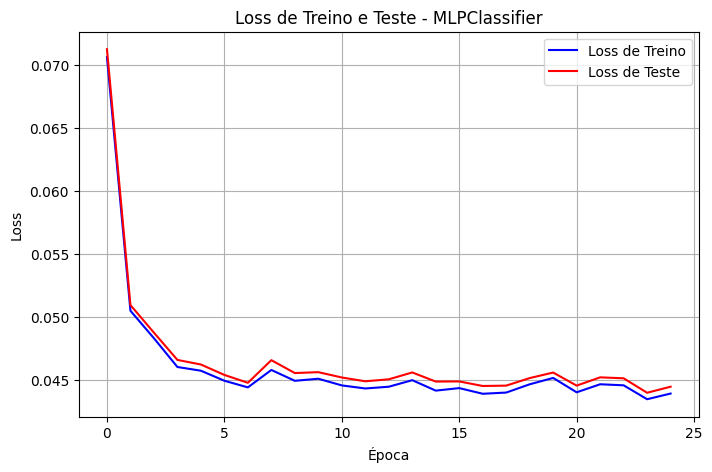

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss_list, label='Loss de Treino', color='blue')
plt.plot(test_loss_list, label='Loss de Teste', color='red')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Loss de Treino e Teste - MLPClassifier')
plt.legend()
plt.grid()
plt.show()


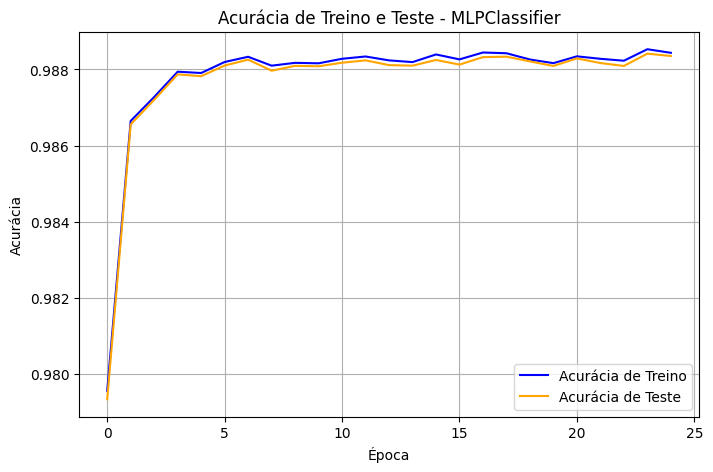

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(train_acc_list, label='Acurácia de Treino', color='blue')
plt.plot(test_acc_list, label='Acurácia de Teste', color='orange')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia de Treino e Teste - MLPClassifier')
plt.legend()
plt.grid()
plt.show()


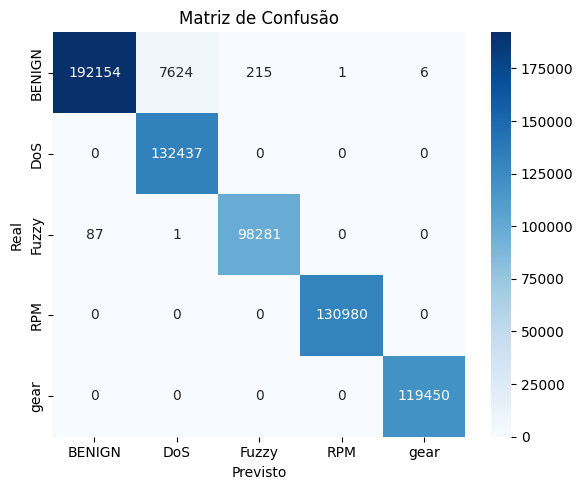

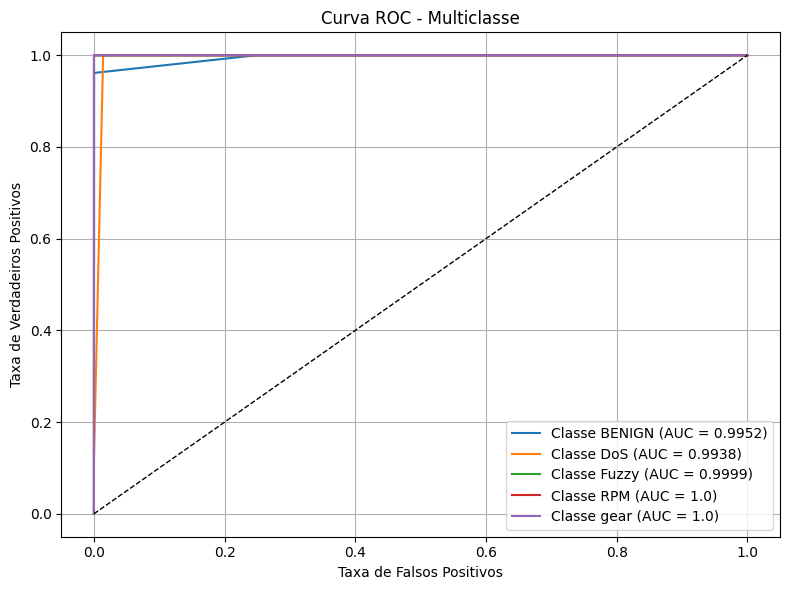

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
# --- Matriz de Confusão ---
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

#   y_train_proba = mlp_model.predict_proba(X_train)
#     y_test_proba = mlp_model.predict_proba(X_test)
# --- Tabela de Métricas ---
report = classification_report(y_test, y_pred, target_names=le.classes_.astype(str), output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(4)
report_df

# --- Curva ROC para Multiclasse ---
# Binariza as saídas
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
n_classes = y_test_bin.shape[1]

# Calcular curva ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar todas as curvas ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Classe {le.classes_[i]} (AUC = {roc_auc[i]:.4})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - Multiclasse")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()